In [2]:
import pandas as pd

# Always reload the data to avoid stale state
df = pd.read_csv("/Users/dejmen/desktop/ironhack/week7/day1/project-ml-house-pricing/data/raw/data_house.csv") 

df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
columns_to_drop = ["yr_renovated", "date", "long", "lat", "id"]

unnamed_cols = [col for col in df.columns if 'unnamed' in col.lower()]
columns_to_drop.extend(unnamed_cols)

df_cleaned = df.drop(columns=columns_to_drop)
df_cleaned

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,98103,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,98146,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,98144,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,98027,1410,1287


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

null_values = df_cleaned.isnull().sum()
null_values

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
# Check data types
data_types = df_cleaned.dtypes
data_types

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
zipcode            int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
#HINTS FROM IGNACIO:

# Step 1: Compute mean price per ZIP code and sort by the mean price
mean_price_per_zip = df_cleaned.groupby('zipcode')['price'].mean()

# Step 2: Identify the cheapest ZIP code's mean price
min_price = mean_price_per_zip.min()

# Step 3: Create a ZIP code to price ratio mapping
zip_ratio_map = (mean_price_per_zip / min_price).to_dict()

# Step 4: Replace ZIP codes with their price ratio
df_cleaned['zipcode'] = df_cleaned['zipcode'].map(zip_ratio_map)

df_cleaned[['zipcode']].head()


,zipcode
0,1.325796
1,2.003789
2,1.974014
3,2.354786
4,2.926387


In [7]:
df_cleaned.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1.325796,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,2.003789,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,1.974014,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,2.354786,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,2.926387,1800,7503


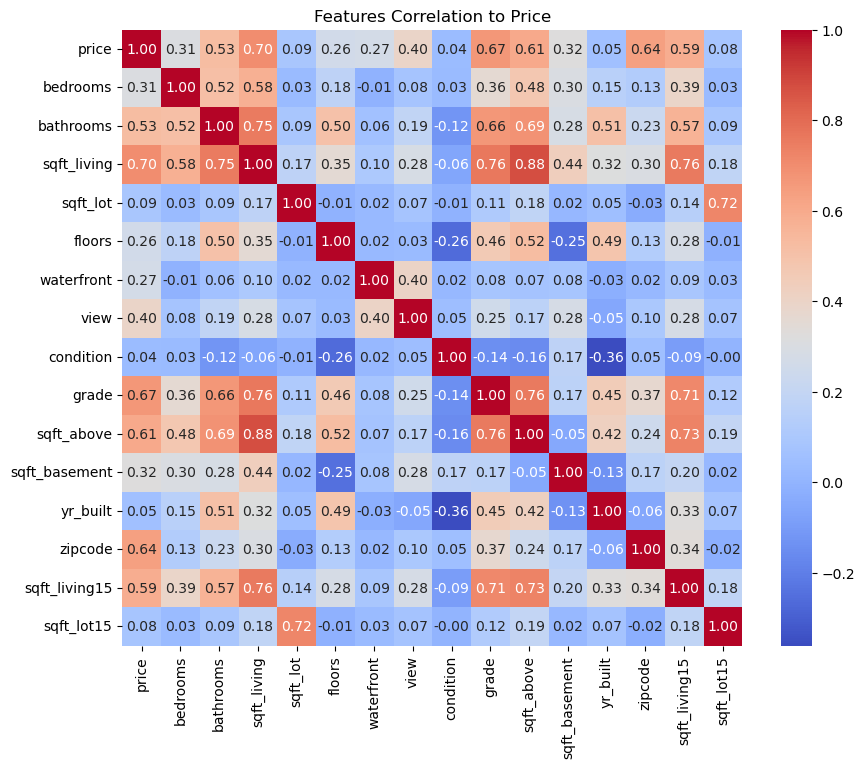

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use your actual DataFrame name, like df_cleaned or df_fe
correlation_matrix = df_cleaned.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Features Correlation to Price")
plt.show()


<Figure size 1600x1200 with 0 Axes>

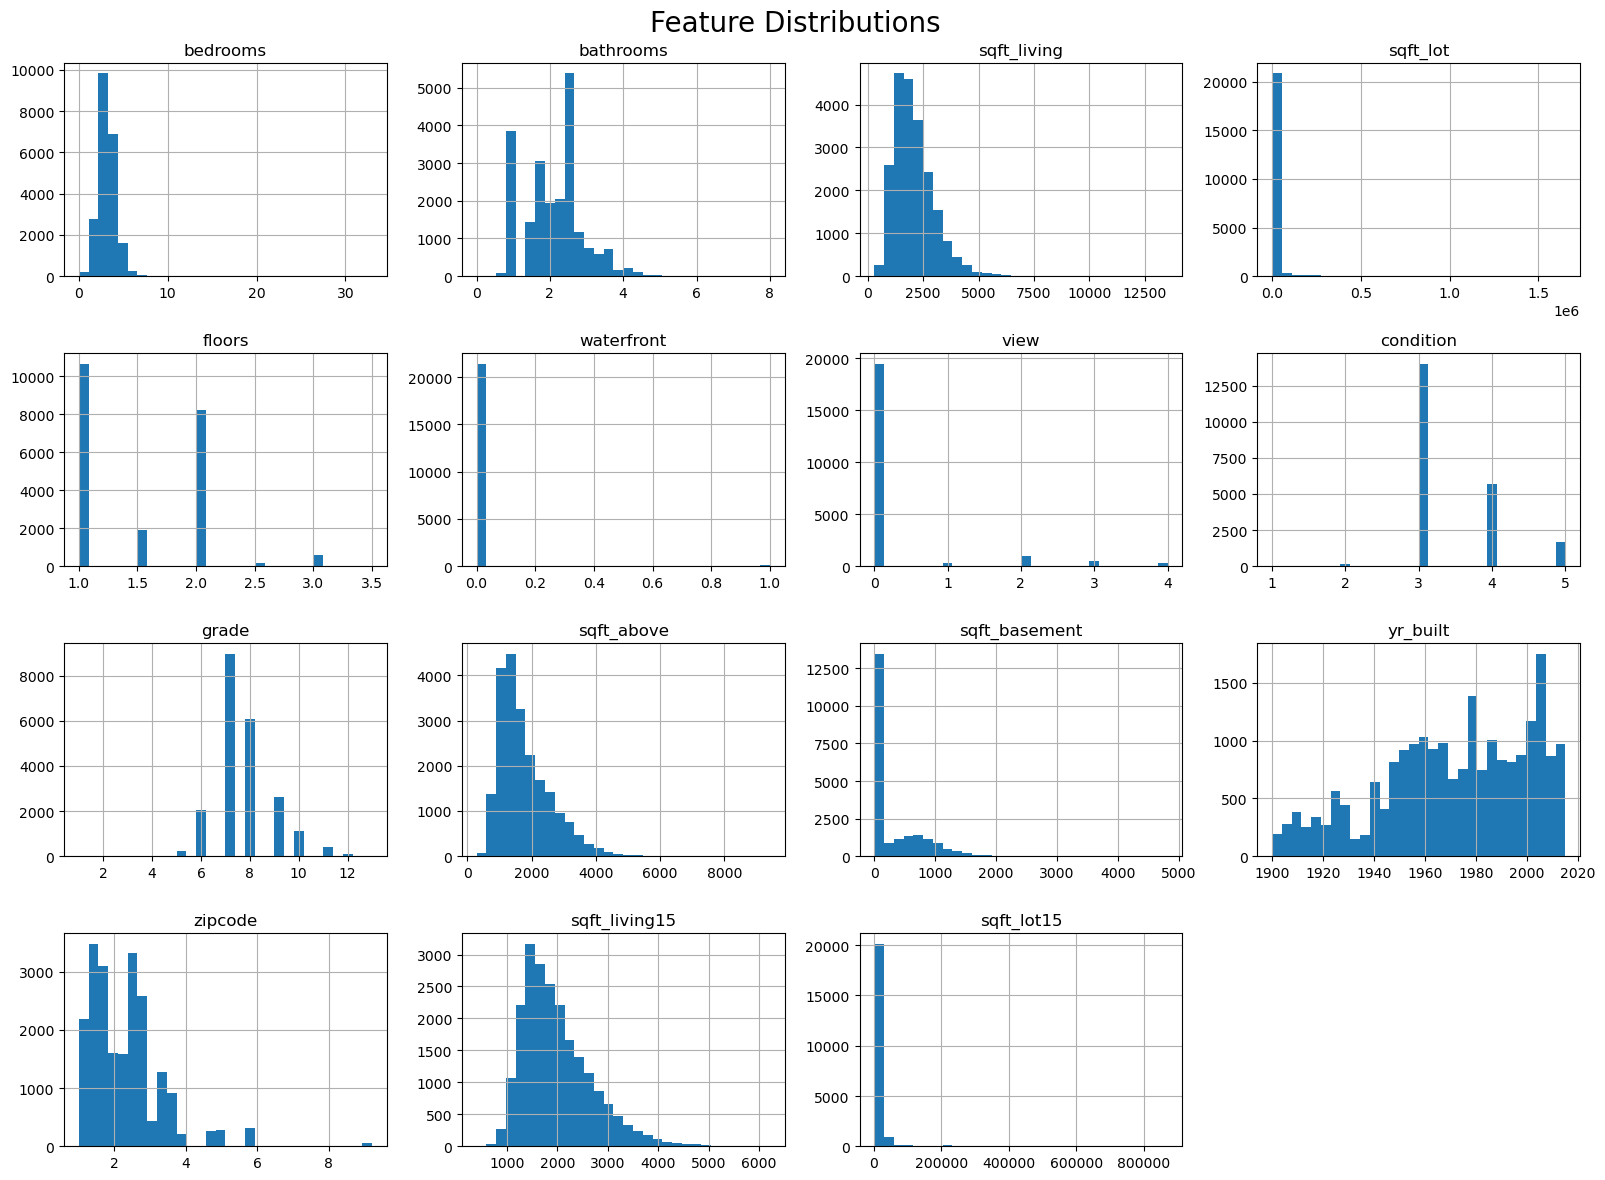

price            1.000000
sqft_living      0.702035
grade            0.667434
zipcode          0.638270
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
waterfront       0.266369
floors           0.256794
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
Name: price, dtype: float64

In [9]:
# Plot feature distributions (excluding 'price')
plt.figure(figsize=(16, 12))
df_cleaned.drop('price', axis=1).hist(bins=30, figsize=(16, 12))
plt.suptitle('Feature Distributions', fontsize=20)
plt.tight_layout()
plt.show()

# Correlation with target variable 'price'
correlation_matrix = df_cleaned.corr()
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)
correlation_with_price

In [10]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = df_cleaned.drop(columns='price') 
y = df_cleaned['price']             

# Split into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# the shape of splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (17290, 15)
X_test shape: (4323, 15)
y_train shape: (17290,)
y_test shape: (4323,)


In [16]:
# Standardization

from sklearn.preprocessing import StandardScaler

#Initialize the scaler
scaler = StandardScaler()

#Fit the scaler ONLY on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform both training and test sets
X_test_scaled = scaler.transform(X_test)
X_train_scaled
X_test_scaled

array([[ 0.67843709,  0.17763643, -0.00429299, ..., -0.79920072,
         0.59760397, -0.18256703],
       [ 1.75213752,  1.15576822,  0.91053768, ...,  0.34275269,
         0.56824457, -0.23404851],
       [ 0.67843709,  0.50368036,  1.86945657, ...,  1.37103184,
         2.53532468, -0.11044936],
       ...,
       [ 0.67843709,  0.50368036,  0.39690986, ..., -1.11140965,
         0.66219466, -0.30246038],
       [ 0.67843709, -0.47445144,  0.19410402, ...,  0.45256379,
         0.0984941 , -0.10808783],
       [ 0.67843709,  0.50368036,  0.54680982, ..., -1.05434632,
         0.65632278, -0.24443927]])

In [15]:
# Normalization

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled
X_test_scaled

array([[0.12121212, 0.28125   , 0.15136054, ..., 0.06194425, 0.34262605,
        0.00809719],
       [0.15151515, 0.375     , 0.22193878, ..., 0.20018273, 0.33918431,
        0.00646948],
       [0.12121212, 0.3125    , 0.29591837, ..., 0.32466045, 0.56978145,
        0.01037736],
       ...,
       [0.12121212, 0.3125    , 0.18231293, ..., 0.02414998, 0.3501979 ,
        0.00430648],
       [0.12121212, 0.21875   , 0.16666667, ..., 0.21347585, 0.28411633,
        0.01045203],
       [0.12121212, 0.3125    , 0.19387755, ..., 0.03105775, 0.34950955,
        0.00614095]])

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the scaled training data
rf_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)


Mean Absolute Error (MAE): 78412.74998121527
R^2 Score: 0.849563167562277


In [ ]:
# MAE tells the average absolute difference between predicted and actual prices.
# R² Score tells how well the model explains the variance in house prices:
# 1.0 = perfect
# 0 = no predictive power

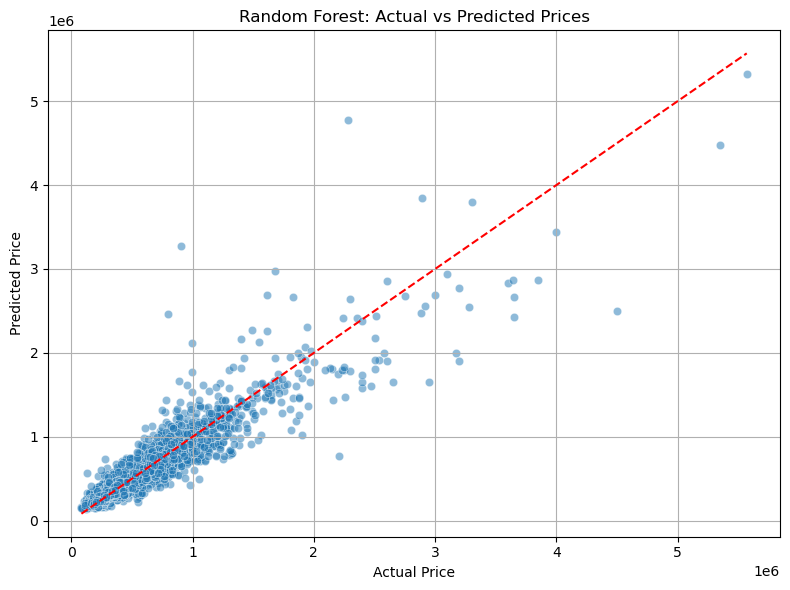

(78412.74998121527, 0.849563167562277)

In [18]:
# Visualize predictions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Actual vs Predicted Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

mae, r2
